### Importacion de las librerias

In [30]:
import pyromat as pyro
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pyro.config

     config_file : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
  config_verbose : False
         dat_dir : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
 dat_exist_fatal : False
   dat_overwrite : True
   dat_recursive : True
     dat_verbose : False
           def_T : 298.15
         def_oob : nan
           def_p : 1.01325
   error_verbose : True
     install_dir : '/Users/daniel/miniforge3/envs/termodinamica/lib/p...
         reg_dir : ['/Users/daniel/miniforge3/envs/termodinamica/lib/...
 reg_exist_fatal : False
   reg_overwrite : True
     reg_verbose : False
     unit_energy : 'kJ'
      unit_force : 'N'
     unit_length : 'm'
       unit_mass : 'kg'
     unit_matter : 'kg'
      unit_molar : 'kmol'
   unit_pressure : 'bar'
unit_temperature : 'K'
       unit_time : 's'
     unit_volume : 'm3'
         version : '2.2.4'
 warning_verbose : True

In [3]:
pyro.config["unit_pressure"]="kPa"

### Establecemos los paraametros del problema

In [4]:
#data
p_1 = p_4 = 8 #Kpa
p_2 = p_3 = 8e3 #Kpa
x_1 = 0
x_3 = 1
rendimiento = 0.85
potencia_neta_salida = 100e3 #KW

## Refrigeracion 
T_entrada = 15 + 273.15 #K
T_salida =  35 + 273.15 #K

### Obtenemos de la base de datos de pyromat el fluido, en este caso agua

In [5]:
agua = pyro.get("mp.H2O")

### Establecemos el estado 1 a partir de los datos conocidos, adional a eso obtneemos los datos necesarios para los calculo

In [6]:
state_1 = agua.state(x=x_1, p=p_1)
s_1 = state_1["s"][0]
h_1 = state_1["h"][0]
T_1 = state_1["T"][0]
V_1 = state_1["v"][0]
state_1

{'p': array([8.00016115]),
 'T': array([314.6582459]),
 'd': array([991.58539733]),
 'x': array([0.]),
 'e': array([173.83277791]),
 'h': array([173.82990197]),
 's': array([0.5924949]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([0.00100849])}

### Establecemos el estado 3 a partir de los datos conocidos, adional a eso obtneemos los datos necesarios para los calculo

In [7]:
state_3 = agua.state(x=x_3, p=p_3)
s_3 = state_3["s"][0]
h_3 = state_3["h"][0]
T_3 = state_3["T"][0]
V_3 = state_3["v"][0]
state_3

{'p': array([8000.31377282]),
 'T': array([568.15800256]),
 'd': array([42.50871116]),
 'x': array([1.]),
 'e': array([2570.49494849]),
 'h': array([2758.6990496]),
 's': array([5.7450184]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([0.02352459])}

### Por concepto en un estado idual la estado 2 tiene la misma entropia que el estado 1.

In [8]:
state_2s = agua.state(p=p_2, s=s_1)
h_2s = agua.h(p=p_2, s=s_1)[0]
state_2s

{'p': array([8000.00007892]),
 'T': array([314.90068932]),
 'd': array([994.96716682]),
 'x': array([-1]),
 'e': array([173.84642424]),
 'h': array([181.88689065]),
 's': array([0.5924949]),
 'cp': array([4.16092113]),
 'cv': array([4.04372193]),
 'gam': array([1.028983]),
 'v': array([0.00100506])}

### Acudiendo a la formula de eficiencia isentropia 

$$ \eta = \frac{h_{2s} - h_1}{h_{2a} - h_1} $$

In [9]:
h_2a = h_1 + 1/rendimiento * (h_2s -h_1)
h_2a

183.3087121777803

### Con la entalpia del estado 2 real buscamos en conjunto con la presion el estado 2, ademas de la temperatura y la entropia

In [10]:
state_2a = agua.state(p=p_2, h=h_2a)
T_2a = state_2a.get("T")[0]
s_2a = state_2a.get("s")[0]
state_2a

{'p': array([8000.00007994]),
 'T': array([315.24239542]),
 'd': array([994.83062775]),
 'x': array([-1]),
 'e': array([175.26714855]),
 'h': array([183.3087185]),
 's': array([0.59700761]),
 'cp': array([4.16101343]),
 'cv': array([4.04221773]),
 'gam': array([1.02938874]),
 'v': array([0.0010052])}

### Encontramos el trabajo de la bomba en kJ  con la primera ley 

In [11]:
w_ba = h_2a - h_1
w_ba

9.478810209493474

### De la misma forma realizamos el procedimiento para el estado 4

In [12]:
state_4s = agua.state(p=p_4, s=s_3)
h_4s = agua.h(p=p_4, s=s_3)[0]
state_4s

{'p': array([8.00016115]),
 'T': array([314.6582459]),
 'd': array([0.08187011]),
 'x': array([0.6748641]),
 'e': array([1697.41072379]),
 'h': array([1795.12489922]),
 's': array([5.7450184]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([12.21447067])}

$$ \eta = \frac{h_{3} - h_{4a}}{h_{3} - h_{4s}} $$

In [13]:
h_4a = h_3 - rendimiento * (h_3 - h_4s)
h_4a 

1939.6610217727389

In [14]:
state_4a = agua.state(p=p_4, h=h_4a)
T_4a = state_4a.get("T")[0]
s_4a = state_4a.get("s")[0]
state_4a

{'p': array([8.00016115]),
 'T': array([314.6582459]),
 'd': array([0.07516941]),
 'x': array([0.73502727]),
 'e': array([1833.23551144]),
 'h': array([1939.66102177]),
 's': array([6.20435848]),
 'cp': array([inf]),
 'cv': array([nan]),
 'gam': array([inf]),
 'v': array([13.3032833])}

### Encontramos el trabajo que genera la turbina

In [15]:
w_ta = h_3 - h_4a
w_ta 

819.0380278232342

### Hallamos el trabajo neto

In [16]:
w_neto = w_ta - w_ba
w_neto

809.5592176137407

### Encoontramos  el calor de entrada

In [17]:
q_entrada = h_3 - h_2a
q_entrada

2575.3903374181928

### Hallamos la eficiencia termica y la relacion de trabajos

In [18]:
eficiencia_termica = w_neto / q_entrada
eficiencia_termica

0.3143442785551945

In [19]:
relacion_retroceso = w_ba/w_ta
relacion_retroceso

0.011573101476967322

### Hallamos  el flujo masico de vapor de agua que se implementa en el proceso

$$\dot{m}*w_{neto} = \dot{W}_{neto}$$

In [20]:
flujo_masico = potencia_neta_salida / w_neto
print("Flujo masico en kg/s", flujo_masico)

Flujo masico en kg/s 123.52400889802765


In [21]:
flujo_masico *= 3600
print("flujo masico en kg/h", flujo_masico)

flujo masico en kg/h 444686.4320328995


### Hallamos el flujo de calor de entrada

In [22]:
flujo_calor_entrada = flujo_masico * q_entrada
print("flujo de calor en KW", flujo_calor_entrada)

flujo de calor en KW 1145241140.2385013


### Hallamos el flujo de calor de salida

In [23]:
q_salida = h_4a - h_1
q_salida

1765.831119804452

In [24]:
flujo_calor_salida = flujo_masico * q_salida
flujo_calor_salida

785241140.2385013

### Calculamos el flujo masico a partir de la primera ley, teniendo como volumen de control al refrigerante.

In [25]:
T_propiedades = (T_salida + T_entrada)/2
T_propiedades

298.15

Para el cp debemos indicar otra propiedad, esto para lo tome como liquido y no como gas ideal.

In [26]:
cp = agua.cp(T=T_propiedades, p =101.3)[0]
cp

4.181359574924171

In [27]:
flujo_masico_agua = flujo_calor_salida/(cp*(T_salida - T_entrada))#(h_salida - h_entrada)
flujo_masico_agua

9389782.51174131

### Una pequeña grafica

In [40]:
entropies = np.linspace(s_1, s_4a, 100)
temperatures = agua.T_s(entropies, p=p_2)

In [60]:
Tt, pt = agua.triple()
Tc, pc = agua.critical()

In [61]:
T = np.arange(Tt,Tc,2.5)
p = agua.ps(T)

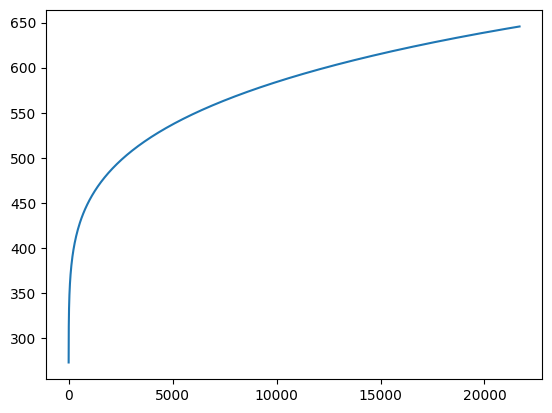

In [63]:
plt.plot(p, T)

In [62]:
dL,dV = agua.ds(T=T)
sL,sV = agua.ss(T=T)

NameError: name 'steam' is not defined

In [56]:
temperature_saturation = np.linspace(T_1, T_4a, 100)
s1, s2 = agua.ss(temperature_saturation)


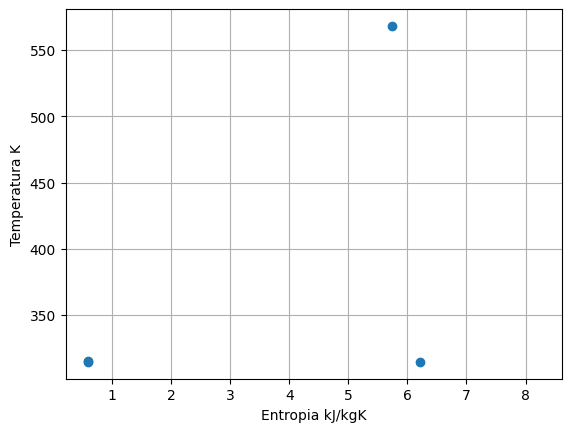

In [58]:
plt.scatter([s_1, s_2a, s_3, s_4a], [T_1, T_2a, T_3, T_4a])
# plt.plot(entropies, temperatures, color="red")
plt.plot(s2, temperature_saturation, )
plt.grid(True)
plt.ylabel("Temperatura K")
plt.xlabel("Entropia kJ/kgK")
plt.show()